In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pycaret.regression import *

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', '{:4f}'.format)

In [3]:
df = pd.read_csv("../kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,1955,0,98178,47.511200,-122.257000,1340,5650
1,6414100192,20141209T000000,538000.000000,3,2.250000,2570,7242,2.000000,0,0,3,7,2170,400,1951,1991,98125,47.721000,-122.319000,1690,7639
2,5631500400,20150225T000000,180000.000000,2,1.000000,770,10000,1.000000,0,0,3,6,770,0,1933,0,98028,47.737900,-122.233000,2720,8062
3,2487200875,20141209T000000,604000.000000,4,3.000000,1960,5000,1.000000,0,0,5,7,1050,910,1965,0,98136,47.520800,-122.393000,1360,5000
4,1954400510,20150218T000000,510000.000000,3,2.000000,1680,8080,1.000000,0,0,3,8,1680,0,1987,0,98074,47.616800,-122.045000,1800,7503


# Data Cleaning Process

It can be seen by following output that the dataset doesn't contain null values 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.000000,4580301520.864988,2876565571.312049,1000102.000000,2123049194.000000,3904930410.000000,7308900445.000000,9900000190.000000
price,21613.000000,540088.141767,367127.196483,75000.000000,321950.000000,450000.000000,645000.000000,7700000.000000
bedrooms,21613.000000,3.370842,0.930062,0.000000,3.000000,3.000000,4.000000,33.000000
bathrooms,21613.000000,2.114757,0.770163,0.000000,1.750000,2.250000,2.500000,8.000000
sqft_living,21613.000000,2079.899736,918.440897,290.000000,1427.000000,1910.000000,2550.000000,13540.000000
sqft_lot,21613.000000,15106.967566,41420.511515,520.000000,5040.000000,7618.000000,10688.000000,1651359.000000
floors,21613.000000,1.494309,0.539989,1.000000,1.000000,1.500000,2.000000,3.500000
waterfront,21613.000000,0.007542,0.086517,0.000000,0.000000,0.000000,0.000000,1.000000
view,21613.000000,0.234303,0.766318,0.000000,0.000000,0.000000,0.000000,4.000000
condition,21613.000000,3.409430,0.650743,1.000000,3.000000,3.000000,4.000000,5.000000


# Data Visualization

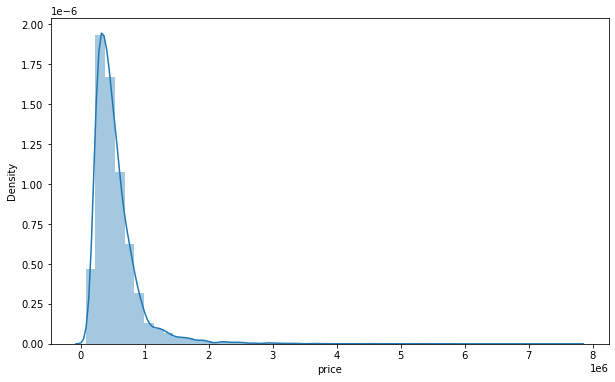

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(df["price"]);

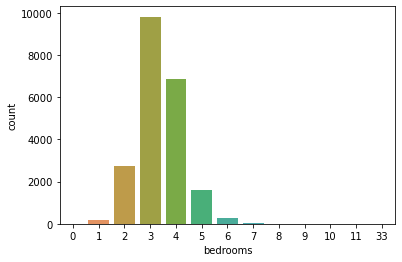

In [7]:
sns.countplot(df["bedrooms"]);

In [8]:
df.corr()["price"].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

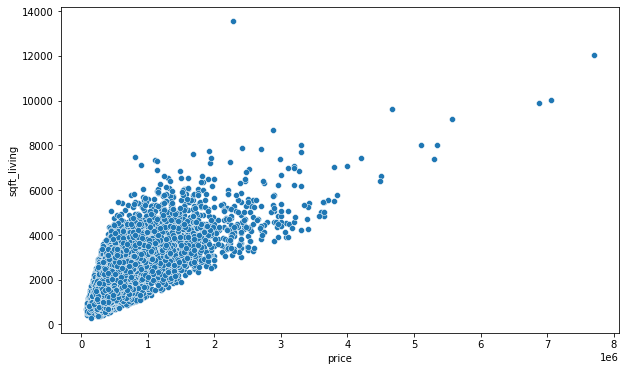

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="price",y="sqft_living",data=df);

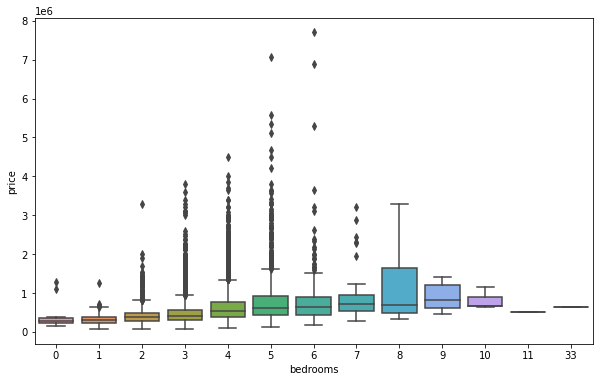

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x="bedrooms",y="price",data=df);

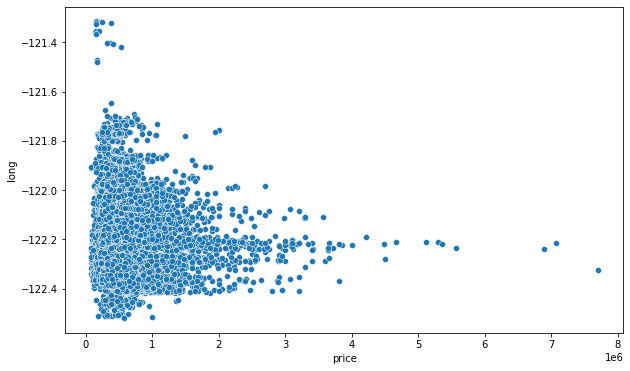

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="price",y="long",data=df);

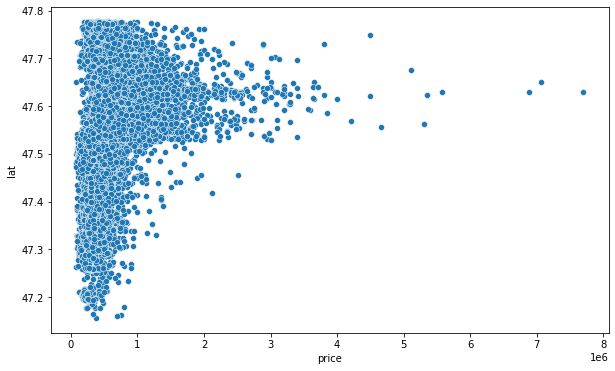

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="price",y="lat",data=df);

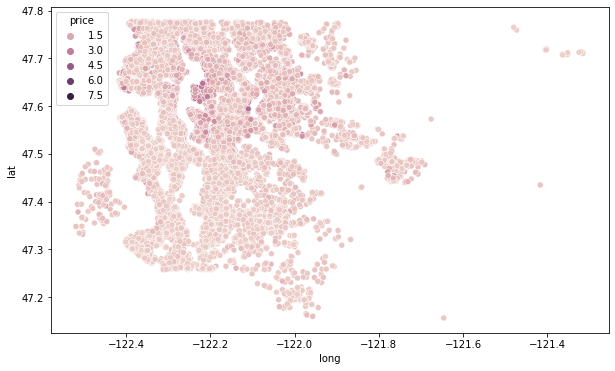

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="long",y="lat",data=df,hue="price");

In [14]:
df.sort_values("price",ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.000000,6,8.000000,12050,27600,2.500000,0,3,4,13,8570,3480,1910,1987,98102,47.629800,-122.323000,3940,8800
3914,9808700762,20140611T000000,7062500.000000,5,4.500000,10040,37325,2.000000,1,2,3,11,7680,2360,1940,2001,98004,47.650000,-122.214000,3930,25449
9254,9208900037,20140919T000000,6885000.000000,6,7.750000,9890,31374,2.000000,0,4,3,13,8860,1030,2001,0,98039,47.630500,-122.240000,4540,42730
4411,2470100110,20140804T000000,5570000.000000,5,5.750000,9200,35069,2.000000,0,0,3,13,6200,3000,2001,0,98039,47.628900,-122.233000,3560,24345
1448,8907500070,20150413T000000,5350000.000000,5,5.000000,8000,23985,2.000000,0,4,3,12,6720,1280,2009,0,98004,47.623200,-122.220000,4600,21750
1315,7558700030,20150413T000000,5300000.000000,6,6.000000,7390,24829,2.000000,1,4,4,12,5000,2390,1991,0,98040,47.563100,-122.210000,4320,24619
1164,1247600105,20141020T000000,5110800.000000,5,5.250000,8010,45517,2.000000,1,4,3,12,5990,2020,1999,0,98033,47.676700,-122.211000,3430,26788
8092,1924059029,20140617T000000,4668000.000000,5,6.750000,9640,13068,1.000000,1,4,3,12,4820,4820,1983,2009,98040,47.557000,-122.210000,3270,10454
2626,7738500731,20140815T000000,4500000.000000,5,5.500000,6640,40014,2.000000,1,4,3,12,6350,290,2004,0,98155,47.749300,-122.280000,3030,23408
8638,3835500195,20140618T000000,4489000.000000,4,3.000000,6430,27517,2.000000,0,0,3,12,6430,0,2001,0,98004,47.620800,-122.219000,3720,14592


In [15]:
len(df)*0.01

216.13

In [16]:
non_top_one_percent = df.sort_values("price",ascending=False).iloc[216:]

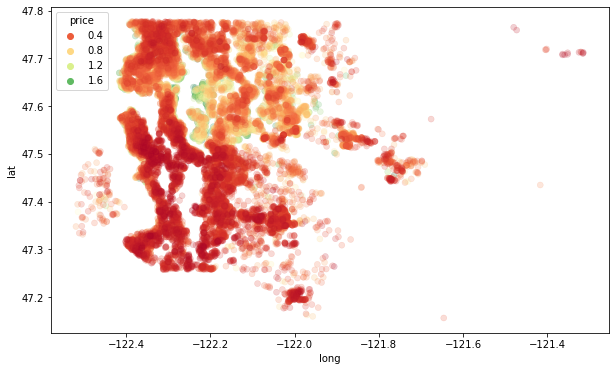

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="long",y="lat",data=non_top_one_percent,edgecolor=None,hue="price",alpha=0.2,palette='RdYlGn');

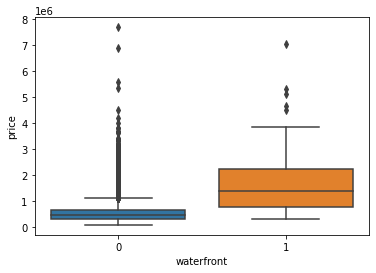

In [18]:
sns.boxplot(x="waterfront",y="price",data=df);

In [19]:
#df.drop('id',axis=1,inplace=True)

In [20]:
df["date"] = pd.to_datetime(df["date"])

In [21]:
def year_extraction(date):
    return date.year

In [22]:
df["year"] = df["date"].apply(lambda date: date.year)

In [23]:
df["month"] = df["date"].apply(lambda date: date.month)

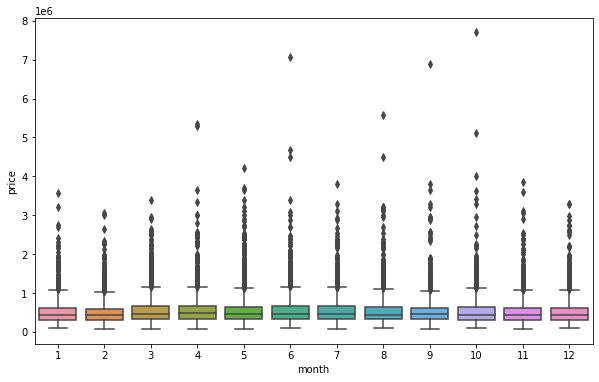

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x="month",y="price",data=df);

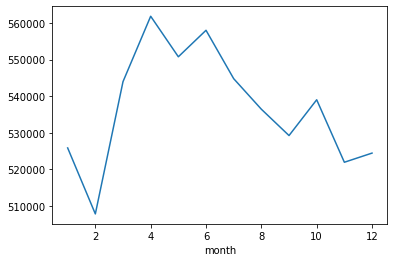

In [25]:
df.groupby('month').mean()["price"].plot();

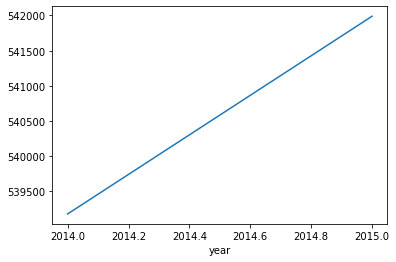

In [26]:
df.groupby('year').mean()["price"].plot();

In [27]:
df.drop("date",axis=1,inplace=True)

In [28]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,1955,0,98178,47.511200,-122.257000,1340,5650,2014,10
1,538000.000000,3,2.250000,2570,7242,2.000000,0,0,3,7,2170,400,1951,1991,98125,47.721000,-122.319000,1690,7639,2014,12
2,180000.000000,2,1.000000,770,10000,1.000000,0,0,3,6,770,0,1933,0,98028,47.737900,-122.233000,2720,8062,2015,2
3,604000.000000,4,3.000000,1960,5000,1.000000,0,0,5,7,1050,910,1965,0,98136,47.520800,-122.393000,1360,5000,2014,12
4,510000.000000,3,2.000000,1680,8080,1.000000,0,0,3,8,1680,0,1987,0,98074,47.616800,-122.045000,1800,7503,2015,2


In [29]:
df["zipcode"].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
98065    310
98122    290
98146    288
98028    283
98008    283
98040    282
98198    280
98003    280
98031    274
98072    273
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, dtype: int64

In [30]:
df.drop("zipcode",axis=1,inplace=True)

In [31]:
df["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
1997       15
1988       15
2011       13
1980       11
2012       11
1982       11
1979       10
1970        9
1968        8
1977        8
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, 

In [32]:
df["sqft_basement"].value_counts()

0       13126
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
580        85
840        85
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
940        72
290        72
770        71
910        71
350        70
1200       70
880        69
440        69
520        69
1010       68
920        68
630        68
760        66
740        66
730        65
960        65
560        64
430        64
640        63
950        63
280        63
460        63
340        63
790        63
570        62
820        62
830        59
1060       59
310        58
980        57
540        57
1040       57
140        56
810        56
470        55
250        55
120        54
990        54
890        53
660        52
1020       52
1070  

In [33]:
#X = df.drop("price",axis=1).values
#y = df["price"].values

In [34]:
df.drop("year",axis=1,inplace=True)
df.drop("month",axis=1,inplace=True)

In [35]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,1955,0,47.511200,-122.257000,1340,5650
1,538000.000000,3,2.250000,2570,7242,2.000000,0,0,3,7,2170,400,1951,1991,47.721000,-122.319000,1690,7639
2,180000.000000,2,1.000000,770,10000,1.000000,0,0,3,6,770,0,1933,0,47.737900,-122.233000,2720,8062
3,604000.000000,4,3.000000,1960,5000,1.000000,0,0,5,7,1050,910,1965,0,47.520800,-122.393000,1360,5000
4,510000.000000,3,2.000000,1680,8080,1.000000,0,0,3,8,1680,0,1987,0,47.616800,-122.045000,1800,7503


In [36]:
data = df.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (19452, 18)
Unseen Data For Predictions: (2161, 18)


In [37]:
exp_reg = setup(data = df, target = 'price', session_id=100, numeric_features=['bedrooms']) 

,Description,Value
0,session_id,100
1,Target,price
2,Original Data,"(21613, 18)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(15129, 36)"


In [38]:
#compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,64763.7081,14118444654.7655,118280.7391,0.8948,0.1677,0.1239,7.9210
lightgbm,Light Gradient Boosting Machine,68557.8303,16065268538.3080,126396.1980,0.8801,0.1757,0.1310,0.4310
xgboost,Extreme Gradient Boosting,70019.6469,16760992256.0000,129179.4227,0.8749,0.1786,0.1320,2.2430
et,Extra Trees Regressor,71884.1312,18148211845.4357,134509.1914,0.8649,0.1851,0.1359,3.7660
rf,Random Forest Regressor,71283.6167,18192466321.1945,134574.4920,0.8644,0.1825,0.1344,5.5520
gbr,Gradient Boosting Regressor,81898.4004,20441472447.5540,142805.6904,0.8477,0.2024,0.1573,1.7920
dt,Decision Tree Regressor,103431.7325,35648159454.2622,188501.4515,0.7337,0.2587,0.1908,0.1640
ridge,Ridge Regression,119528.2672,36850809241.6000,191839.6875,0.7245,0.3161,0.2334,0.1170
llar,Lasso Least Angle Regression,119312.3323,36865313688.1751,191877.3163,0.7244,0.3124,0.2324,0.0270
br,Bayesian Ridge,119406.1969,36869695274.5553,191889.8854,0.7243,0.3138,0.2328,0.0540


In [39]:
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,64904.6800,12680044797.2070,112605.7050,0.8988,0.1701,0.1269
1,63113.3156,12813815296.4678,113198.1241,0.9067,0.1630,0.1218
2,64841.4071,13639958717.4207,116790.2338,0.8980,0.1710,0.1286
3,64914.8731,22973248983.1742,151569.2877,0.8375,0.1697,0.1231
4,64671.3423,11923732871.6955,109195.8464,0.9148,0.1699,0.1251
5,64453.6170,13589752498.4351,116575.0938,0.8945,0.1647,0.1218
6,65441.4814,13541006675.9217,116365.8312,0.9052,0.1712,0.1237
7,64106.9348,13214176228.2630,114952.9305,0.9094,0.1624,0.1198
8,65456.1328,13393253357.7599,115729.2243,0.8842,0.1671,0.1221
9,65733.2965,13415457121.3101,115825.1144,0.8992,0.1676,0.1260


In [40]:
tuned_model = tune_model(cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,79506.0001,18100554541.3324,134538.3014,0.8555,0.1978,0.1537
1,75628.6574,17247413650.9881,131329.4089,0.8744,0.1933,0.1502
2,77599.8728,18812797770.7630,137159.7527,0.8594,0.2039,0.1570
3,78942.7886,26979609488.2555,164254.7092,0.8091,0.1971,0.1518
4,78572.7483,16534767481.9269,128587.5868,0.8818,0.1989,0.1525
5,77412.5620,18034842164.4812,134293.8650,0.8599,0.1900,0.1463
6,78472.0019,17839146507.3517,133563.2678,0.8751,0.1980,0.1507
7,79533.5190,19207544683.3040,138591.2865,0.8683,0.1929,0.1474
8,78158.1811,17133840352.7063,130896.2962,0.8519,0.1916,0.1488
9,77000.0975,16294445018.0982,127649.6965,0.8776,0.1926,0.1509


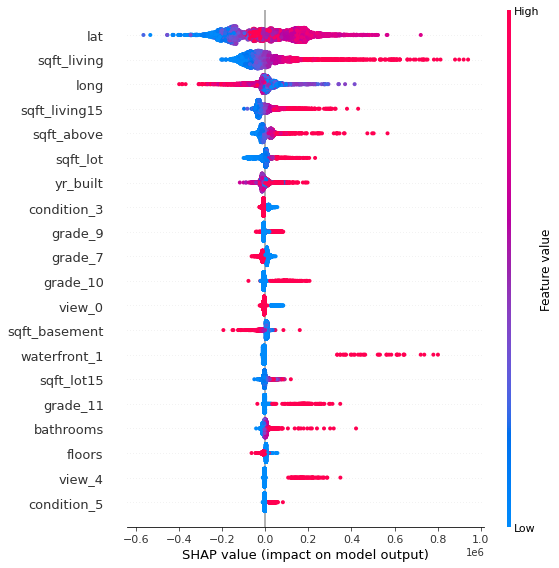

In [41]:
interpret_model(cat)

In [42]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [43]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,77461.8963,17741186840.8751,133196.0466,0.8692,0.1902,0.1479


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,price,Label
0,3.000000,2.500000,2437.000000,5136.000000,2.000000,2437.000000,0.000000,2011.000000,0.000000,47.351700,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,285000.000000,328399.356569
1,3.000000,2.500000,1560.000000,4800.000000,2.000000,1560.000000,0.000000,1974.000000,0.000000,47.265301,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,239950.000000,236320.781714
2,3.000000,2.500000,2390.000000,47480.000000,2.000000,2390.000000,0.000000,2007.000000,0.000000,47.451698,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,460000.000000,474212.422349
3,3.000000,1.000000,1480.000000,5100.000000,1.500000,1480.000000,0.000000,1938.000000,1959.000000,47.691502,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,397500.000000,498626.206444
4,4.000000,3.500000,1880.000000,1341.000000,3.000000,1650.000000,230.000000,2007.000000,0.000000,47.605301,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,545000.000000,598658.175695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,4.000000,2.500000,2811.000000,7251.000000,2.000000,2811.000000,0.000000,2009.000000,0.000000,47.368599,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,455000.000000,484459.510900
6480,3.000000,3.000000,1910.000000,4800.000000,1.500000,1910.000000,0.000000,1900.000000,1991.000000,47.657200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,850000.000000,742794.857716
6481,4.000000,2.250000,2450.000000,11960.000000,1.000000,2450.000000,0.000000,1979.000000,0.000000,47.635101,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,712000.000000,695263.921317
6482,3.000000,2.250000,1453.000000,2225.000000,2.000000,1453.000000,0.000000,1986.000000,0.000000,47.542900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,460000.000000,407448.105507


In [44]:
final_model = finalize_model(tuned_model)
print(final_model)

In [45]:
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,74039.2398,13781894259.1982,117396.3128,0.8984,0.1862,0.1447


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,price,Label
0,3.000000,2.500000,2437.000000,5136.000000,2.000000,2437.000000,0.000000,2011.000000,0.000000,47.351700,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,285000.000000,327055.660076
1,3.000000,2.500000,1560.000000,4800.000000,2.000000,1560.000000,0.000000,1974.000000,0.000000,47.265301,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,239950.000000,235892.065686
2,3.000000,2.500000,2390.000000,47480.000000,2.000000,2390.000000,0.000000,2007.000000,0.000000,47.451698,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,460000.000000,460442.815476
3,3.000000,1.000000,1480.000000,5100.000000,1.500000,1480.000000,0.000000,1938.000000,1959.000000,47.691502,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,397500.000000,499922.548755
4,4.000000,3.500000,1880.000000,1341.000000,3.000000,1650.000000,230.000000,2007.000000,0.000000,47.605301,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,545000.000000,583480.892908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,4.000000,2.500000,2811.000000,7251.000000,2.000000,2811.000000,0.000000,2009.000000,0.000000,47.368599,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,455000.000000,479595.418349
6480,3.000000,3.000000,1910.000000,4800.000000,1.500000,1910.000000,0.000000,1900.000000,1991.000000,47.657200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,850000.000000,752916.716278
6481,4.000000,2.250000,2450.000000,11960.000000,1.000000,2450.000000,0.000000,1979.000000,0.000000,47.635101,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,712000.000000,716479.633788
6482,3.000000,2.250000,1453.000000,2225.000000,2.000000,1453.000000,0.000000,1986.000000,0.000000,47.542900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,460000.000000,427561.311136


## Prediction on unseen data

In [47]:
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Label
0,142000.000000,0,0.000000,290,20875,1.000000,0,0,1,1,290,0,1963,0,47.530800,-121.888000,1620,22850,309377.982509
1,300000.000000,3,1.750000,1310,9761,1.000000,0,0,3,7,1310,0,1967,0,47.721000,-122.228000,1490,9600,368910.106759
2,780000.000000,2,3.250000,3000,24004,1.000000,0,0,3,10,2410,590,1952,0,47.611000,-122.157000,4270,24506,1010144.494154
3,545000.000000,3,2.500000,2660,20369,2.000000,0,0,3,8,2660,0,1992,0,47.523400,-122.055000,2720,12927,543666.932269
4,278000.000000,3,2.250000,2120,9804,2.000000,0,0,3,7,2120,0,1994,0,47.359600,-122.160000,2120,7200,316391.710105


In [49]:
save_model(final_model,'Final_Catboost_Model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['bedrooms'],
                                       target='price', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='price')),
                 ('fix_perfect', Remove_100(target='price')),
                 ('clean_names', Clean_Colum_Names()),
                 ('

In [51]:
saved_final_model = load_model('Final_Catboost_Model')
new_prediction = predict_model(saved_final_model, data=data_unseen)
new_prediction.head()

Transformation Pipeline and Model Successfully Loaded


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Label
0,142000.000000,0,0.000000,290,20875,1.000000,0,0,1,1,290,0,1963,0,47.530800,-121.888000,1620,22850,309377.982509
1,300000.000000,3,1.750000,1310,9761,1.000000,0,0,3,7,1310,0,1967,0,47.721000,-122.228000,1490,9600,368910.106759
2,780000.000000,2,3.250000,3000,24004,1.000000,0,0,3,10,2410,590,1952,0,47.611000,-122.157000,4270,24506,1010144.494154
3,545000.000000,3,2.500000,2660,20369,2.000000,0,0,3,8,2660,0,1992,0,47.523400,-122.055000,2720,12927,543666.932269
4,278000.000000,3,2.250000,2120,9804,2.000000,0,0,3,7,2120,0,1994,0,47.359600,-122.160000,2120,7200,316391.710105
